# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [114]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [17]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=150)
lngs = np.random.uniform(low=-180.000, high=180.000, size=150)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

111

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [109]:
params = {"units": "imperial", "appid": api_key}
data_fields = ["name", "sys.country","clouds.all", "dt", "main.humidity", "coord.lat", "coord.lon",
              "main.temp_max","wind.speed"]


column_names = ["City", "Country", "Cloudiness", "Date", "Humidity",
                                    "Lat", "Lng", "Max Temp", "Wind Speed"]

weather_df = pd.DataFrame(columns = column_names)

counter = 0

print("Begin weather data collection")

for city in cities:
    try:
        current_weather = owm.get_current(city, **params)
        print(f"Processing record {counter}: {city}")
        weather_df.loc[counter] = current_weather(*data_fields)
        counter += 1
        
    except:
        print(f"Skipping - City weather not found: {city}")
    

Begin weather data collection
Processing record 0: ushuaia
Processing record 1: samarai
Processing record 2: cooma
Processing record 3: gambela
Processing record 4: san cristobal
Processing record 5: vaini
Processing record 6: green river
Processing record 7: chokurdakh
Processing record 8: saint george
Skipping - City weather not found: mentok
Processing record 9: punta arenas
Processing record 10: san andres
Processing record 11: bethel
Processing record 12: prado
Processing record 13: la mira
Processing record 14: rikitea
Processing record 15: jamestown
Processing record 16: cape town
Processing record 17: kapaa
Processing record 18: porto novo
Processing record 19: katsuura
Skipping - City weather not found: tabiauea
Processing record 20: port hueneme
Processing record 21: east london
Skipping - City weather not found: tumannyy
Processing record 22: ketchikan
Processing record 23: boyolangu
Processing record 24: upernavik
Processing record 25: mataura
Processing record 26: ribeira 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [110]:
weather_df.to_csv(output_data_file)
weather_df.count()

City          99
Country       99
Cloudiness    99
Date          99
Humidity      99
Lat           99
Lng           99
Max Temp      99
Wind Speed    99
dtype: int64

In [111]:
weather_df.head()

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,AR,75,1551308400,81,-54.81,-68.31,48.20,26.40
1,Samarai,PG,76,1551309192,100,-10.62,150.67,81.69,10.78
2,Cooma,AU,32,1551308400,64,-36.24,149.13,68.00,10.29
3,Gambela,ET,92,1551311181,75,8.25,34.59,65.44,1.50
4,San Cristobal,EC,75,1551310309,77,-0.39,-78.55,62.60,9.17


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [119]:
datetime.fromtimestamp(1551310309)
datetime.now().year

2019

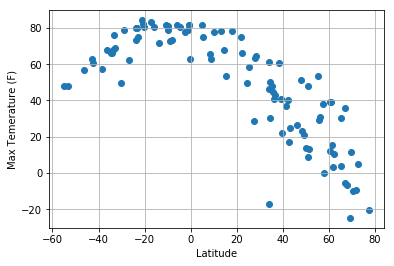

In [131]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temerature (F)")
plt.show()

#### Latitude vs. Humidity Plot

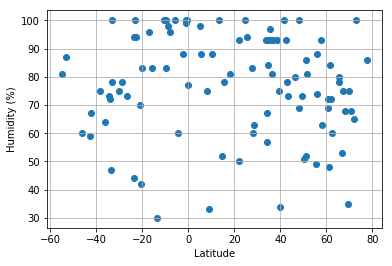

In [130]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

#### Latitude vs. Cloudiness Plot

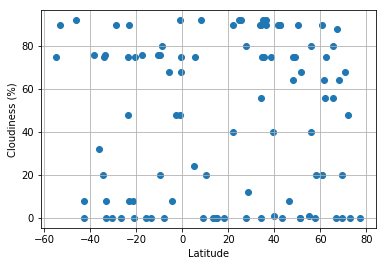

In [129]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

#### Latitude vs. Wind Speed Plot

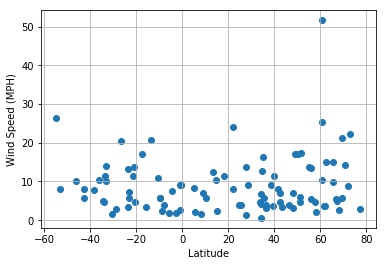

In [127]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.show()